In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_002/0261_Project_002_Data/housing.csv")
#df = pd.read_csv("/xx/xx/Desktop/housing.csv")

# Dropping Missing Values
df.dropna(axis=0, inplace=True)

## X, y (features and labels)
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"].copy()


## Feature Scaling
##Z-Score
import scipy.stats as stats

stats.zscore(a=X.select_dtypes('float'), axis=0)
feat1 = X.select_dtypes("float").apply(lambda x: stats.zscore(a=x, axis=0, ddof=0, nan_policy='propagate'))
feat1.agg(["mean", "std"])


### Feature Engineering
##Ocean Proximity
## Will use replace and True:1, False: 0
dummies_ocean_prox = pd.get_dummies(data=X["ocean_proximity"], drop_first=False)
dummies_ocean_prox = dummies_ocean_prox.replace({True: 1, False: 0})
dummies_ocean_prox.head(3)

features = pd.concat([feat1, dummies_ocean_prox], axis=1)
features

#### Features and Labels for Model Creation
X02 = features.copy()
y02 = df["median_house_value"].copy()


In [11]:
y02.mean()
###206864.41315519012
y.median()
###179700.0

206864.41315519012

179700.0

In [4]:
# Train Test Split
#### Train Validation Test Split - 80-20 80-10-10
from sklearn.model_selection import train_test_split

X_train, X_valid_tobe, y_train, y_valid_tobe = train_test_split(X02,
                                                                y02, 
                                                                test_size=0.2,
                                                                random_state=42,
                                                                shuffle=True,
                                                                stratify=None)


X_valid, X_test, y_valid, y_test = train_test_split(X_valid_tobe,
                                                    y_valid_tobe, 
                                                    test_size=0.5,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)




In [5]:
df_all_model_results = pd.read_csv('/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_002/0261_Project_002_Data/Saved_Results/df_results_01.csv',
                                   index_col='Unnamed: 0')

df_all_model_results = df_all_model_results.rename(columns={"mae":"mae_score",
                                                            "rmse":"rmse_score"})

df_all_model_results

,mae_score,rmse_score
linreg_model_001_001,49564.93,67706.03
poly_reg_valid_error_deg1,49564.93,67706.03
grid_elasticnet_model_001_001,49551.93,67672.26
grid_elasticnet_model_001_002,49557.13,67685.12
grid_elasticnet_model_001_003,49555.83,67681.83
score_logreg_model_001_001_valid,153733.42,198670.26
knn_model_001_002,41275.47,61374.90
grid_svm_model_001_001,84320.53,113044.25
grid_tree_model_001_001,41109.14,64120.25
grid_tree_model_001_002,41109.14,64120.25


In [6]:
df_all_results_sort_mae = df_all_model_results.sort_values(by="mae_score")
df_all_results_sort_rmse = df_all_model_results.sort_values(by="rmse_score")


# To See model Performance increase between models - Start

In [30]:
df_all_results_sort_rmse_02 = df_all_results_sort_rmse.sort_values(by='rmse_score')
df_all_results_sort_rmse_02['rmse_score'].max()##198670.2587


198670.2587

In [42]:
##df_all_results_sort_rmse_02['rmse_score'].max() - 100%
##df_all_results_sort_rmse_02['rmse_score'].min() - X%
df_all_results_sort_rmse_02['rmse_score'].max()##198670.2587
df_all_results_sort_rmse_02['rmse_score'].min()##48090.5366

percentage_of_improvement_max_min_rmse_score = ((df_all_results_sort_rmse_02['rmse_score'].max() - df_all_results_sort_rmse_02['rmse_score'].min()) * 100) / (df_all_results_sort_rmse_02['rmse_score'].max())
percentage_of_improvement_max_min_rmse_score


75.79379172570636

In [43]:
df_all_results_sort_mae['mae_score'].max()##153733.42
df_all_results_sort_mae['mae_score'].min()##31867.0469

percentage_of_improvement_max_min_mae_score = ((df_all_results_sort_mae['mae_score'].max() - df_all_results_sort_mae['mae_score'].min()) * 100) / (df_all_results_sort_mae['mae_score'].max())
percentage_of_improvement_max_min_mae_score



79.27123009427618

# To See model Performance increase between models - End

## Model Result Analysis Part 01

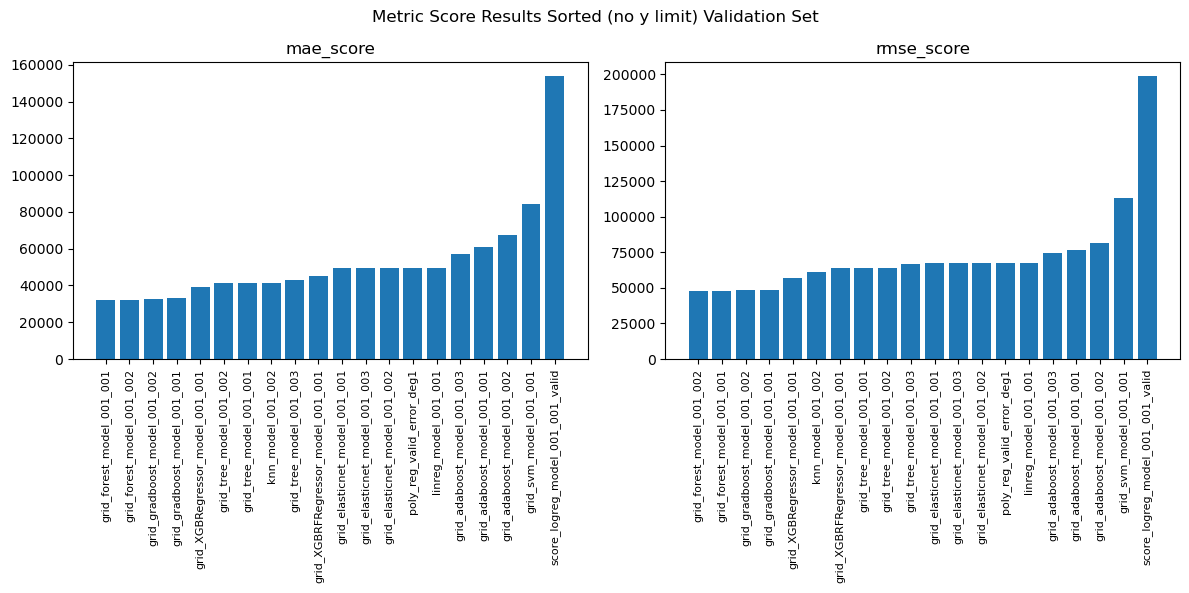

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_sort_mae['mae_score'].index, height=df_all_results_sort_mae['mae_score'].values)
axes[1].bar(x=df_all_results_sort_rmse['rmse_score'].index, height=df_all_results_sort_rmse['rmse_score'].values)

axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')

axes[0].set_xticks(ticks=range(0,20,1), labels=df_all_results_sort_mae['mae_score'].index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,20,1), labels=df_all_results_sort_rmse['rmse_score'].index, rotation=90, fontsize=8)


plt.suptitle("Metric Score Results Sorted (no y limit) Validation Set", fontsize=12)

plt.tight_layout()
plt.show()

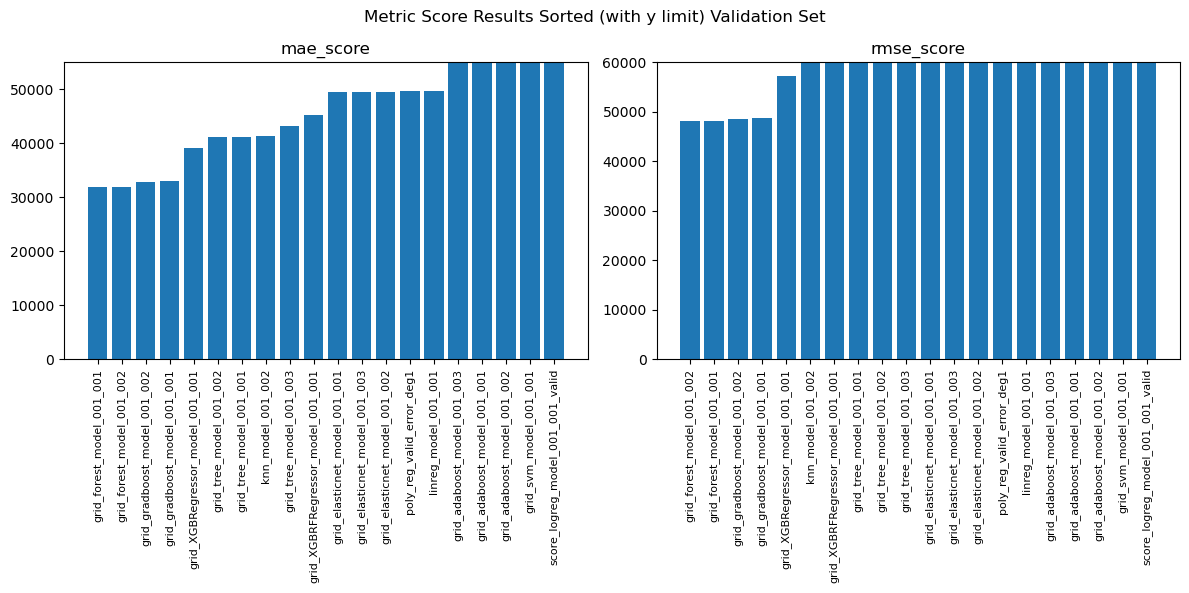

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_sort_mae['mae_score'].index, height=df_all_results_sort_mae['mae_score'].values)
axes[1].bar(x=df_all_results_sort_rmse['rmse_score'].index, height=df_all_results_sort_rmse['rmse_score'].values)


axes[0].set_ylim(0,55000)
axes[1].set_ylim(0,60000)

axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')


axes[0].set_xticks(ticks=range(0,20,1), labels=df_all_results_sort_mae['mae_score'].index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,20,1), labels=df_all_results_sort_rmse['rmse_score'].index, rotation=90, fontsize=8)

plt.suptitle("Metric Score Results Sorted (with y limit) Validation Set", fontsize=12)

plt.tight_layout()
plt.show()


In [13]:
df_all_model_results.sort_values(by=["rmse_score", "mae_score"])[0:10]


,mae_score,rmse_score
grid_forest_model_001_002,31878.65,48090.54
grid_forest_model_001_001,31867.05,48100.59
grid_gradboost_model_001_002,32810.95,48457.53
grid_gradboost_model_001_001,33055.99,48681.07
grid_XGBRegressor_model_001_001,39170.28,57131.60
knn_model_001_002,41275.47,61374.90
grid_XGBRFRegressor_model_001_001,45182.25,63844.17
grid_tree_model_001_001,41109.14,64120.25
grid_tree_model_001_002,41109.14,64120.25
grid_tree_model_001_003,43144.53,66740.08


In [119]:
df_all_model_results.sort_values(by=["mae_score","rmse_score"])[0:10]


,mae_score,rmse_score
grid_forest_model_001_001,31867.05,48100.59
grid_forest_model_001_002,31878.65,48090.54
grid_gradboost_model_001_002,32810.95,48457.53
grid_gradboost_model_001_001,33055.99,48681.07
grid_XGBRegressor_model_001_001,39170.28,57131.60
grid_tree_model_001_001,41109.14,64120.25
grid_tree_model_001_002,41109.14,64120.25
knn_model_001_002,41275.47,61374.90
grid_tree_model_001_003,43144.53,66740.08
grid_XGBRFRegressor_model_001_001,45182.25,63844.17


In [120]:
print("Best 10 Models Sorted by MAE and RMSE")
print("")

print("Sorting by RMSE and then by MAE")
print(df_all_model_results.sort_values(by=["rmse_score", "mae_score"])[0:10])
print("")
print("Sorting by MAE and then by RMSE")
print(df_all_model_results.sort_values(by=["mae_score","rmse_score"])[0:10])


Best 10 Models Sorted by MAE and RMSE

Sorting by RMSE and then by MAE
                                   mae_score  rmse_score
grid_forest_model_001_002           31878.65    48090.54
grid_forest_model_001_001           31867.05    48100.59
grid_gradboost_model_001_002        32810.95    48457.53
grid_gradboost_model_001_001        33055.99    48681.07
grid_XGBRegressor_model_001_001     39170.28    57131.60
knn_model_001_002                   41275.47    61374.90
grid_XGBRFRegressor_model_001_001   45182.25    63844.17
grid_tree_model_001_001             41109.14    64120.25
grid_tree_model_001_002             41109.14    64120.25
grid_tree_model_001_003             43144.53    66740.08

Sorting by MAE and then by RMSE
                                   mae_score  rmse_score
grid_forest_model_001_001           31867.05    48100.59
grid_forest_model_001_002           31878.65    48090.54
grid_gradboost_model_001_002        32810.95    48457.53
grid_gradboost_model_001_001        33055

In [121]:
df_all_results_sort_mae_best10_02 = pd.DataFrame(df_all_results_sort_mae['mae_score'][:10])
df_all_results_sort_rmse_best10_02 = pd.DataFrame(df_all_results_sort_rmse['rmse_score'][:10])


df_all_results_sort_mae_best10_02['df_index'] = df_all_results_sort_mae_best10_02['mae_score'][:10].index
df_all_results_sort_rmse_best10_02['df_index'] = df_all_results_sort_rmse_best10_02['rmse_score'][:10].index

df_all_results_sort_mae_best10_02
df_all_results_sort_rmse_best10_02



,rmse_score,df_index
grid_forest_model_001_002,48090.54,grid_forest_model_001_002
grid_forest_model_001_001,48100.59,grid_forest_model_001_001
grid_gradboost_model_001_002,48457.53,grid_gradboost_model_001_002
grid_gradboost_model_001_001,48681.07,grid_gradboost_model_001_001
grid_XGBRegressor_model_001_001,57131.60,grid_XGBRegressor_model_001_001
knn_model_001_002,61374.90,knn_model_001_002
grid_XGBRFRegressor_model_001_001,63844.17,grid_XGBRFRegressor_model_001_001
grid_tree_model_001_001,64120.25,grid_tree_model_001_001
grid_tree_model_001_002,64120.25,grid_tree_model_001_002
grid_tree_model_001_003,66740.08,grid_tree_model_001_003


In [125]:
#df_all_results_sort_mae_best10_02[df_all_results_sort_mae_best10_02['df_index'].isin(df_all_results_sort_rmse_best10_02['df_index'])]

## To see if they are not in
df_all_results_sort_mae_best10_02[~df_all_results_sort_mae_best10_02['df_index'].isin(df_all_results_sort_rmse_best10_02['df_index'])]


,mae_score,df_index


In [126]:
print("Models located in both MAE and RMSE")
df_all_results_sort_mae_best10_02[df_all_results_sort_mae_best10_02['df_index'].isin(df_all_results_sort_rmse_best10_02['df_index'])]['df_index']

Models located in both MAE and RMSE


grid_forest_model_001_001                    grid_forest_model_001_001
grid_forest_model_001_002                    grid_forest_model_001_002
grid_gradboost_model_001_002              grid_gradboost_model_001_002
grid_gradboost_model_001_001              grid_gradboost_model_001_001
grid_XGBRegressor_model_001_001        grid_XGBRegressor_model_001_001
grid_tree_model_001_002                        grid_tree_model_001_002
grid_tree_model_001_001                        grid_tree_model_001_001
knn_model_001_002                                    knn_model_001_002
grid_tree_model_001_003                        grid_tree_model_001_003
grid_XGBRFRegressor_model_001_001    grid_XGBRFRegressor_model_001_001
Name: df_index, dtype: object

In [127]:
df_all_results_sort_mae_best10 = df_all_results_sort_mae['mae_score'][:10]
df_all_results_sort_rmse_best10 = df_all_results_sort_rmse['rmse_score'][:10]

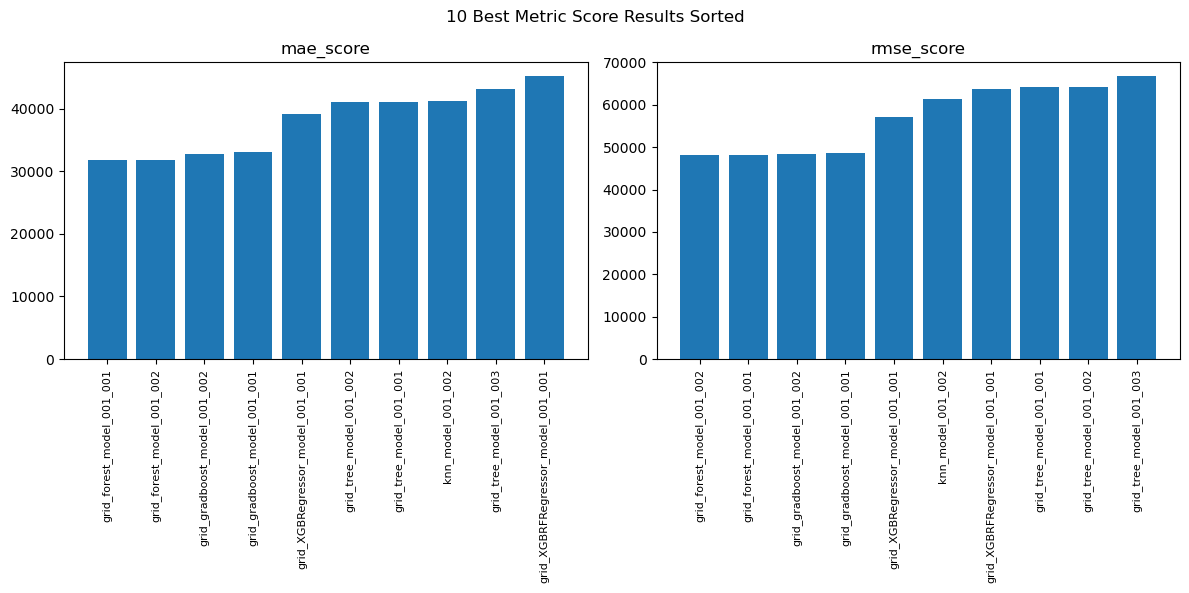

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_sort_mae_best10.index, height=df_all_results_sort_mae_best10.values)
axes[1].bar(x=df_all_results_sort_rmse_best10.index, height=df_all_results_sort_rmse_best10.values)

axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')

axes[0].set_xticks(ticks=range(0,10,1), labels=df_all_results_sort_mae_best10.index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,10,1), labels=df_all_results_sort_rmse_best10.index, rotation=90, fontsize=8)

plt.suptitle("10 Best Metric Score Results Sorted")

plt.tight_layout()
plt.show()

### Process To follow:

### Train and test Following models on 80% Training Data and Test them with Holdout Test Set

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_002/0261_Project_002_Data/housing.csv")
#df = pd.read_csv("/xx/xx/Desktop/housing.csv")

# Dropping Missing Values
df.dropna(axis=0, inplace=True)

## X, y (features and labels)
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"].copy()


## Feature Scaling
##Z-Score
import scipy.stats as stats

stats.zscore(a=X.select_dtypes('float'), axis=0)
feat1 = X.select_dtypes("float").apply(lambda x: stats.zscore(a=x, axis=0, ddof=0, nan_policy='propagate'))
feat1.agg(["mean", "std"])


### Feature Engineering
##Ocean Proximity
## Will use replace and True:1, False: 0
dummies_ocean_prox = pd.get_dummies(data=X["ocean_proximity"], drop_first=False)
dummies_ocean_prox = dummies_ocean_prox.replace({True: 1, False: 0})
dummies_ocean_prox.head(3)

features = pd.concat([feat1, dummies_ocean_prox], axis=1)
features

#### Features and Labels for Model Creation
X02 = features.copy()
y02 = df["median_house_value"].copy()


# Train Test Split
#### Train Validation Test Split - 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X02,
                                                    y02, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)




|   |     Models To Train         |
|----|-------------------------------|
| 1  |grid_elasticnet_model_001_001|
| 2  |grid_elasticnet_model_001_003|
| 3  |knn_model_001_002|
| 4  |grid_tree_model_001_001|
| 5  |grid_tree_model_001_002|
| 6  |grid_tree_model_001_003|
| 7  |grid_forest_model_001_001|
| 8  |grid_forest_model_001_002|
| 9  |grid_gradboost_model_001_002|
| 10 |grid_gradboost_model_001_001|
| 11 |grid_XGBRegressor_model_001_001|
| 12 |grid_XGBRFRegressor_model_001_001|




# Models Part 02

In [2]:
# grid_elasticnet_model_001_001
##ElasticNet(alpha=5, l1_ratio=1, max_iter=5000, random_state=42)
from sklearn.linear_model import ElasticNet

elasticnet_model_001_001 = ElasticNet(alpha=5,
                                      l1_ratio=1,
                                      fit_intercept=True,
                                      precompute=False,
                                      max_iter=5000,## Default 1000
                                      copy_X=True,
                                      tol=0.0001,
                                      warm_start=False,
                                      positive=False,
                                      random_state=42,## Default None
                                      selection='cyclic')

elasticnet_model_001_001.fit(X_train, y_train)

ElasticNet(alpha=5, l1_ratio=1, max_iter=5000, random_state=42)

In [3]:
# grid_elasticnet_model_001_002
## 2. elasticnet_model_001_002          0.6355
##2. grid_elasticnet_model_001_002
##ElasticNet(alpha=3, l1_ratio=1, max_iter=5000, random_state=42)

from sklearn.linear_model import ElasticNet

elasticnet_model_001_002 = ElasticNet(alpha=3,
                                      l1_ratio=1,
                                      fit_intercept=True,
                                      precompute=False,
                                      max_iter=5000,## Default 1000
                                      copy_X=True,
                                      tol=0.0001,
                                      warm_start=False,
                                      positive=False,
                                      random_state=42,## Default None
                                      selection='cyclic')

elasticnet_model_001_002.fit(X_train, y_train)

ElasticNet(alpha=3, l1_ratio=1, max_iter=5000, random_state=42)

In [4]:
# grid_elasticnet_model_001_003
## 3. elasticnet_model_001_003          0.6353
##print(grid_elasticnet_model_001_003.best_estimator_)
##ElasticNet(alpha=3.5, l1_ratio=1, max_iter=5000, random_state=42)

elasticnet_model_001_003 = ElasticNet(alpha=3.5,
                                      l1_ratio=1,
                                      fit_intercept=True,
                                      precompute=False,
                                      max_iter=5000,## Default 1000
                                      copy_X=True,
                                      tol=0.0001,
                                      warm_start=False,
                                      positive=False,
                                      random_state=42,## Default None
                                      selection='cyclic')

elasticnet_model_001_003.fit(X_train, y_train)

ElasticNet(alpha=3.5, l1_ratio=1, max_iter=5000, random_state=42)

In [5]:

# knn_model_001_002 - 4 Neighbors
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

knn_model_001_002 = KNeighborsRegressor(n_neighbors=4,## Default 5
                                             weights='uniform',
                                             algorithm='auto',
                                             leaf_size=30,
                                             p=2,
                                             metric='minkowski',
                                             metric_params=None,
                                             n_jobs=None)

## Fit the model
knn_model_001_002.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [6]:
# grid_tree_model_001_001
#print(grid_tree_model_001_001.best_params_)
#{'criterion': 'poisson', 'splitter': 'best'}
#print(grid_tree_model_001_001.best_estimator_)
#DecisionTreeRegressor(criterion='poisson', random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree_model_001_001 = DecisionTreeRegressor(criterion='poisson',
                                           splitter='best',
                                           max_depth=None,
                                           min_samples_split=2,
                                           min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,
                                           max_features=None,
                                           random_state=42,## Default None
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           ccp_alpha=0.0)


tree_model_001_001.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', random_state=42)

In [7]:
# grid_tree_model_001_002
## Decision Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


tree_model_001_002 = DecisionTreeRegressor(criterion='squared_error',
                                           splitter='best',
                                           max_depth=None,
                                           min_samples_split=2,
                                           min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,
                                           max_features=None,
                                           random_state=42,## Default None
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           ccp_alpha=0.0)

tree_model_001_002.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
# grid_tree_model_001_003
#print(grid_tree_model_001_003.best_params_)
##{'criterion': 'squared_error', 'splitter': 'best'}
#print(grid_tree_model_001_003.best_estimator_)
##DecisionTreeRegressor(random_state=42)

## 5. grid_tree_model_001_003           0.6655
##tree_model_001_003
##
##
from sklearn.tree import DecisionTreeRegressor

tree_model_001_003 = DecisionTreeRegressor(criterion='squared_error',
                                           splitter='best',
                                           max_depth=None,
                                           min_samples_split=2,
                                           min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,
                                           max_features=None,
                                           random_state=42,## Default None
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           ccp_alpha=0.0)


tree_model_001_003.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
# grid_forest_model_001_001
## 6. grid_forest_model_001_001         0.8290
##forest_model_001_001
##
##
from sklearn.ensemble import RandomForestRegressor

forest_model_001_001 = RandomForestRegressor(n_estimators=200,
                                              criterion='squared_error',
                                              max_depth=None,
                                              min_samples_split=2,
                                              min_samples_leaf=1,
                                              min_weight_fraction_leaf=0.0,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              bootstrap=False,
                                              oob_score=False,
                                              n_jobs=None,
                                              random_state=42,## Default None
                                              verbose=0,
                                              warm_start=False,
                                              ccp_alpha=0.0,
                                              max_samples=None)


forest_model_001_001.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=200,
                      random_state=42)

In [10]:
# grid_forest_model_001_002
## 7. grid_forest_model_001_002
##forest_model_001_002
##
##
from sklearn.ensemble import RandomForestRegressor

forest_model_001_002 = RandomForestRegressor(n_estimators=280,
                                              criterion='squared_error',
                                              max_depth=None,
                                              min_samples_split=2,
                                              min_samples_leaf=1,
                                              min_weight_fraction_leaf=0.0,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              bootstrap=False,
                                              oob_score=False,
                                              n_jobs=None,
                                              random_state=42,## Default None
                                              verbose=0,
                                              warm_start=False,
                                              ccp_alpha=0.0,
                                              max_samples=None)


forest_model_001_002.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=280,
                      random_state=42)

In [11]:
# grid_gradboost_model_001_002
## 8. adaboost_model_001_002             0.5639
##adaboost_model_001_002
##
##
from sklearn.ensemble import AdaBoostRegressor

adaboost_model_001_002 = AdaBoostRegressor(estimator=None,
                                           n_estimators=20,
                                           learning_rate=1.0,
                                           loss='linear',
                                           random_state=42)


adaboost_model_001_002.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=20, random_state=42)

In [12]:
# grid_gradboost_model_001_001
## 9. grid_gradboost_model_001_001       0.8286
##gradboost_model_001_001
##Best Estimator Chosen:
##GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=120,
##                          random_state=42)

from sklearn.ensemble import GradientBoostingRegressor

gradboost_model_001_001 = GradientBoostingRegressor(loss='squared_error',
                                                            learning_rate=0.2,
                                                            n_estimators=120,
                                                            subsample=1.0,
                                                            criterion='friedman_mse',
                                                            min_samples_split=2,
                                                            min_samples_leaf=1,
                                                            min_weight_fraction_leaf=0.0,
                                                            max_depth=5,
                                                            min_impurity_decrease=0.0,
                                                            init=None,
                                                            random_state=42,
                                                            max_features=None,
                                                            alpha=0.9,
                                                            verbose=0,
                                                            max_leaf_nodes=None,
                                                            warm_start=False,
                                                            validation_fraction=0.1,
                                                            n_iter_no_change=None,
                                                            tol=0.0001,
                                                            ccp_alpha=0.0)


gradboost_model_001_001.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=120,
                          random_state=42)

In [13]:
## 10. grid_gradboost_model_001_002      0.8301
##gradboost_model_001_002
##Best Estimator Chosen:
##GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=130,
##                          random_state=42)

from sklearn.ensemble import GradientBoostingRegressor

gradboost_model_001_002 = GradientBoostingRegressor(loss='squared_error',
                                                            learning_rate=0.2,
                                                            n_estimators=130,
                                                            subsample=1.0,
                                                            criterion='friedman_mse',
                                                            min_samples_split=2,
                                                            min_samples_leaf=1,
                                                            min_weight_fraction_leaf=0.0,
                                                            max_depth=5,
                                                            min_impurity_decrease=0.0,
                                                            init=None,
                                                            random_state=42,
                                                            max_features=None,
                                                            alpha=0.9,
                                                            verbose=0,
                                                            max_leaf_nodes=None,
                                                            warm_start=False,
                                                            validation_fraction=0.1,
                                                            n_iter_no_change=None,
                                                            tol=0.0001,
                                                            ccp_alpha=0.0)


gradboost_model_001_002.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=130,
                          random_state=42)

In [14]:
import xgboost as xg
##XGBRegressor
##Best Params:
##{'n_estimators': 10, 'objective': 'reg:linear', 'seed': 42}

xgboost_XGBRegressor_model_001_001 = xg.XGBRegressor(n_estimators=10,
                                                     objective='reg:linear',
                                                     seed=42,
                                                     base_score=None, booster=None, callbacks=None,
                                                     colsample_bylevel=None, colsample_bynode=None,
                                                     colsample_bytree=None, early_stopping_rounds=None,
                                                     enable_categorical=False, eval_metric=None, feature_types=None,
                                                     gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                                                     interaction_constraints=None, learning_rate=None, max_bin=None,
                                                     max_cat_threshold=None, max_cat_to_onehot=None,
                                                     max_delta_step=None, max_depth=None, max_leaves=None,
                                                     min_child_weight=None, monotone_constraints=None,
                                                     n_jobs=None, num_parallel_tree=None,predictor=None)

##ValueError: feature_names must be string, and may not contain [, ] or <
#xgboost_XGBRegressor_model_001_001.fit(X_train, y_train)
xgboost_XGBRegressor_model_001_001.fit(X_train.values, y_train.values)



[12:49:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [15]:
import xgboost as xg
##XGBRFRegressor
##Best Parameters:
##{'colsample_bynode': 0.8, 'learning_rate': 1.0, 'reg_lambda': 1e-05, 'subsample': 0.8}


xgboost_XGBRFRegressor_model_001_001 = xg.XGBRFRegressor(colsample_bynode=0.8,
                                                         learning_rate=1.0,
                                                         reg_lambda=1e-05,
                                                         subsample=0.8,
                                                         seed=42,
                                                         base_score=None, booster=None, callbacks=None,
                                                         colsample_bylevel=None, colsample_bytree=None,
                                                         early_stopping_rounds=None, enable_categorical=False,
                                                         eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                                                         grow_policy=None, importance_type=None,
                                                         interaction_constraints=None, max_bin=None,
                                                         max_cat_threshold=None, max_cat_to_onehot=None,
                                                         max_delta_step=None, max_depth=None, max_leaves=None,
                                                         min_child_weight=None, monotone_constraints=None,
                                                         n_estimators=100, n_jobs=None, num_parallel_tree=None,
                                                         objective='reg:squarederror', predictor=None, random_state=None,
                                                         reg_alpha=None)



##ValueError: feature_names must be string, and may not contain [, ] or <
#xgboost_XGBRFRegressor_model_001_001.fit(X_train, y_train)

xgboost_XGBRFRegressor_model_001_001.fit(X_train.values, y_train.values)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [16]:

elasticnet_model_001_001_test_preds = elasticnet_model_001_001.predict(X_test)
elasticnet_model_001_002_test_preds = elasticnet_model_001_002.predict(X_test)
elasticnet_model_001_003_test_preds = elasticnet_model_001_003.predict(X_test)
knn_model_001_002_test_preds = knn_model_001_002.predict(X_test)
tree_model_001_001_test_preds = tree_model_001_001.predict(X_test)
tree_model_001_002_test_preds = tree_model_001_002.predict(X_test)
tree_model_001_003_test_preds = tree_model_001_003.predict(X_test)
forest_model_001_001_test_preds = forest_model_001_001.predict(X_test)
forest_model_001_002_test_preds = forest_model_001_002.predict(X_test)
adaboost_model_001_002_test_preds = adaboost_model_001_002.predict(X_test)
gradboost_model_001_001_test_preds = gradboost_model_001_001.predict(X_test)
gradboost_model_001_002_test_preds = gradboost_model_001_002.predict(X_test)



In [17]:
## MAE
mae_elasticnet_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=elasticnet_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')
mae_elasticnet_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=elasticnet_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')
mae_elasticnet_model_001_003_test = mean_absolute_error(y_true=y_test, y_pred=elasticnet_model_001_003_test_preds, sample_weight=None, multioutput='uniform_average')
mae_knn_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=knn_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')
mae_tree_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=tree_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')
mae_tree_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=tree_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')
mae_tree_model_001_003_test = mean_absolute_error(y_true=y_test, y_pred=tree_model_001_003_test_preds, sample_weight=None, multioutput='uniform_average')
mae_forest_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=forest_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')
mae_forest_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=forest_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')
mae_adaboost_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=adaboost_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')
mae_gradboost_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=gradboost_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')
mae_gradboost_model_001_002_test = mean_absolute_error(y_true=y_test, y_pred=gradboost_model_001_002_test_preds, sample_weight=None, multioutput='uniform_average')



## RMSE
rmse_elasticnet_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elasticnet_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_elasticnet_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elasticnet_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_elasticnet_model_001_003_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elasticnet_model_001_003_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_knn_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=knn_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_tree_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=tree_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_tree_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=tree_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_tree_model_001_003_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=tree_model_001_003_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_forest_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=forest_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_forest_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=forest_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_adaboost_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=adaboost_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_gradboost_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=gradboost_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_gradboost_model_001_002_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=gradboost_model_001_002_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))



In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
xgboost_XGBRegressor_model_001_001_test_preds = xgboost_XGBRegressor_model_001_001.predict(X_test)
xgboost_XGBRFRegressor_model_001_001_test_preds = xgboost_XGBRFRegressor_model_001_001.predict(X_test)


mae_xgboost_XGBRegressor_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=xgboost_XGBRegressor_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')
mae_xgboost_XGBRFRegressor_model_001_001_test = mean_absolute_error(y_true=y_test, y_pred=xgboost_XGBRFRegressor_model_001_001_test_preds, sample_weight=None, multioutput='uniform_average')


rmse_xgboost_XGBRegressor_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=xgboost_XGBRegressor_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))
rmse_xgboost_XGBRFRegressor_model_001_001_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=xgboost_XGBRFRegressor_model_001_001_test_preds,sample_weight=None,multioutput='uniform_average',squared=True))



In [49]:
df_results_02 = pd.DataFrame([

{"elasticnet_model_001_001_test":mae_elasticnet_model_001_001_test,
"elasticnet_model_001_002_test":mae_elasticnet_model_001_002_test,
"elasticnet_model_001_003_test":mae_elasticnet_model_001_003_test,
"knn_model_001_002_test":mae_knn_model_001_002_test,
"tree_model_001_001_test":mae_tree_model_001_001_test,
"tree_model_001_002_test":mae_tree_model_001_002_test,
"tree_model_001_003_test":mae_tree_model_001_003_test,
"forest_model_001_001_test":mae_forest_model_001_001_test,
"forest_model_001_002_test":mae_forest_model_001_002_test,
"adaboost_model_001_002_test":mae_adaboost_model_001_002_test,
"gradboost_model_001_001_test":mae_gradboost_model_001_001_test,
"gradboost_model_001_002_test":mae_gradboost_model_001_002_test,
'xgboost_XGBRegressor_model_001_001_test':mae_xgboost_XGBRegressor_model_001_001_test,
'xgboost_XGBRFRegressor_model_001_001_test':mae_xgboost_XGBRFRegressor_model_001_001_test},

{"elasticnet_model_001_001_test":rmse_elasticnet_model_001_001_test,
"elasticnet_model_001_002_test":rmse_elasticnet_model_001_002_test,
"elasticnet_model_001_003_test":rmse_elasticnet_model_001_003_test,
"knn_model_001_002_test":rmse_knn_model_001_002_test,
"tree_model_001_001_test":rmse_tree_model_001_001_test,
"tree_model_001_002_test":rmse_tree_model_001_002_test,
"tree_model_001_003_test":rmse_tree_model_001_003_test,
"forest_model_001_001_test":rmse_forest_model_001_001_test,
"forest_model_001_002_test":rmse_forest_model_001_002_test,
"adaboost_model_001_002_test":rmse_adaboost_model_001_002_test,
"gradboost_model_001_001_test":rmse_gradboost_model_001_001_test,
"gradboost_model_001_002_test":rmse_gradboost_model_001_002_test,
'xgboost_XGBRegressor_model_001_001_test':rmse_xgboost_XGBRegressor_model_001_001_test,
'xgboost_XGBRFRegressor_model_001_001_test':rmse_xgboost_XGBRFRegressor_model_001_001_test}
])

df_results_02 = df_results_02.transpose().rename(columns={0:"mae_score", 1:"rmse_score"})









In [50]:
df_results_02

,mae_score,rmse_score
elasticnet_model_001_001_test,50401.71,69271.35
elasticnet_model_001_002_test,50406.40,69281.26
elasticnet_model_001_003_test,50405.23,69278.70
knn_model_001_002_test,41298.27,62416.06
tree_model_001_001_test,41769.16,65426.15
tree_model_001_002_test,42937.43,67295.40
tree_model_001_003_test,42937.43,67295.40
forest_model_001_001_test,31470.62,48305.16
forest_model_001_002_test,31471.12,48254.10
adaboost_model_001_002_test,68342.02,82549.89


In [52]:
#df_results_02.to_csv('/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_002/0261_Project_002_Data/Saved_Results/df_results_02.csv')

df_results_02=pd.read_csv('/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_002/0261_Project_002_Data/Saved_Results/df_results_02.csv',
                                 index_col='Unnamed: 0')

df_results_02


,mae_score,rmse_score
elasticnet_model_001_001_test,50401.71,69271.35
elasticnet_model_001_002_test,50406.40,69281.26
elasticnet_model_001_003_test,50405.23,69278.70
knn_model_001_002_test,41298.27,62416.06
tree_model_001_001_test,41769.16,65426.15
tree_model_001_002_test,42937.43,67295.40
tree_model_001_003_test,42937.43,67295.40
forest_model_001_001_test,31470.62,48305.16
forest_model_001_002_test,31471.12,48254.10
adaboost_model_001_002_test,68342.02,82549.89


## Model Result Analysis Part 02

In [53]:
df_all_results_02_sort_mae = df_results_02.sort_values(by='mae_score')
df_all_results_02_sort_rmse = df_results_02.sort_values(by='rmse_score')

In [57]:
df_all_results_02_sort_mae
#df_all_results_02_sort_rmse

,mae_score,rmse_score
forest_model_001_001_test,31470.62,48305.16
forest_model_001_002_test,31471.12,48254.10
gradboost_model_001_002_test,32322.58,48405.82
gradboost_model_001_001_test,32578.07,48626.31
xgboost_XGBRegressor_model_001_001_test,39154.85,57983.65
knn_model_001_002_test,41298.27,62416.06
tree_model_001_001_test,41769.16,65426.15
tree_model_001_002_test,42937.43,67295.40
tree_model_001_003_test,42937.43,67295.40
xgboost_XGBRFRegressor_model_001_001_test,45644.85,64875.73


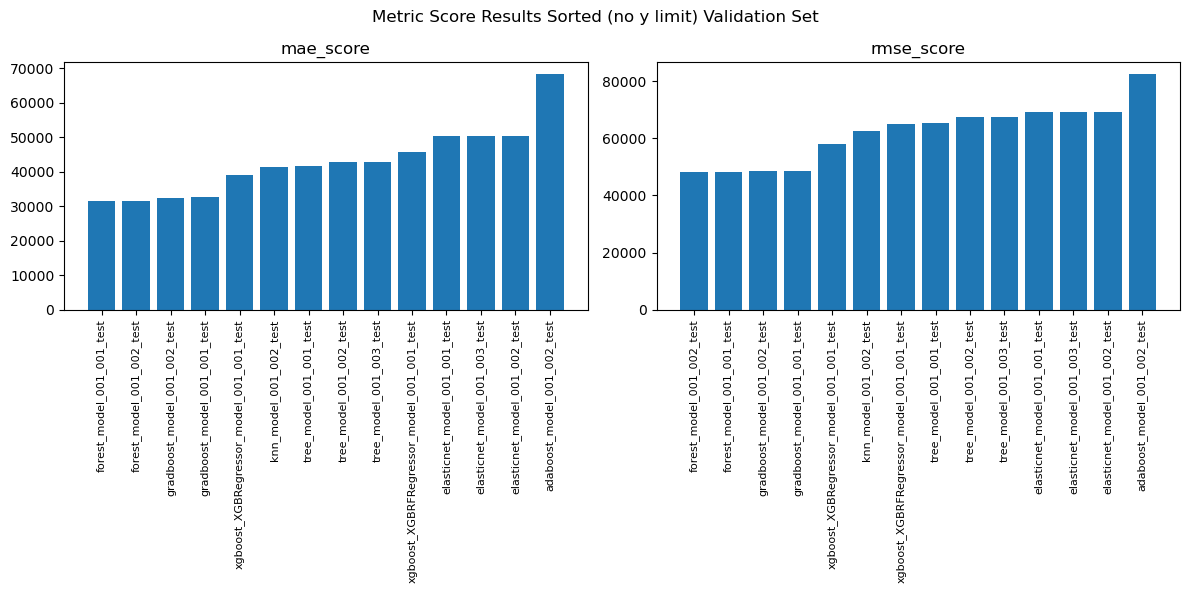

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_02_sort_mae['mae_score'].index, height=df_all_results_02_sort_mae['mae_score'].values)
axes[1].bar(x=df_all_results_02_sort_rmse['rmse_score'].index, height=df_all_results_02_sort_rmse['rmse_score'].values)


axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')

axes[0].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_mae['mae_score'].index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_rmse['rmse_score'].index, rotation=90, fontsize=8)

plt.suptitle("Metric Score Results Sorted (no y limit) Validation Set")

plt.tight_layout()
plt.show()

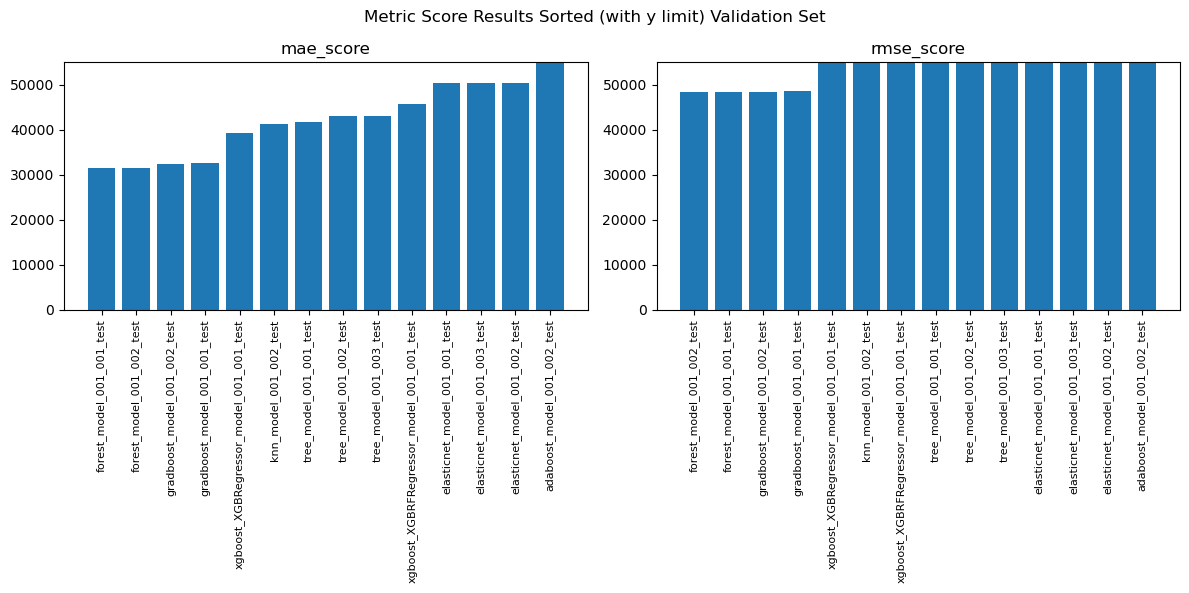

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_02_sort_mae['mae_score'].index, height=df_all_results_02_sort_mae['mae_score'].values)
axes[1].bar(x=df_all_results_02_sort_rmse['rmse_score'].index, height=df_all_results_02_sort_rmse['rmse_score'].values)

axes[0].set_ylim(0,55000)
axes[1].set_ylim(0,55000)

axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')


axes[0].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_mae['mae_score'].index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_rmse['rmse_score'].index, rotation=90, fontsize=8)

plt.suptitle("Metric Score Results Sorted (with y limit) Validation Set")

plt.tight_layout()
plt.show()



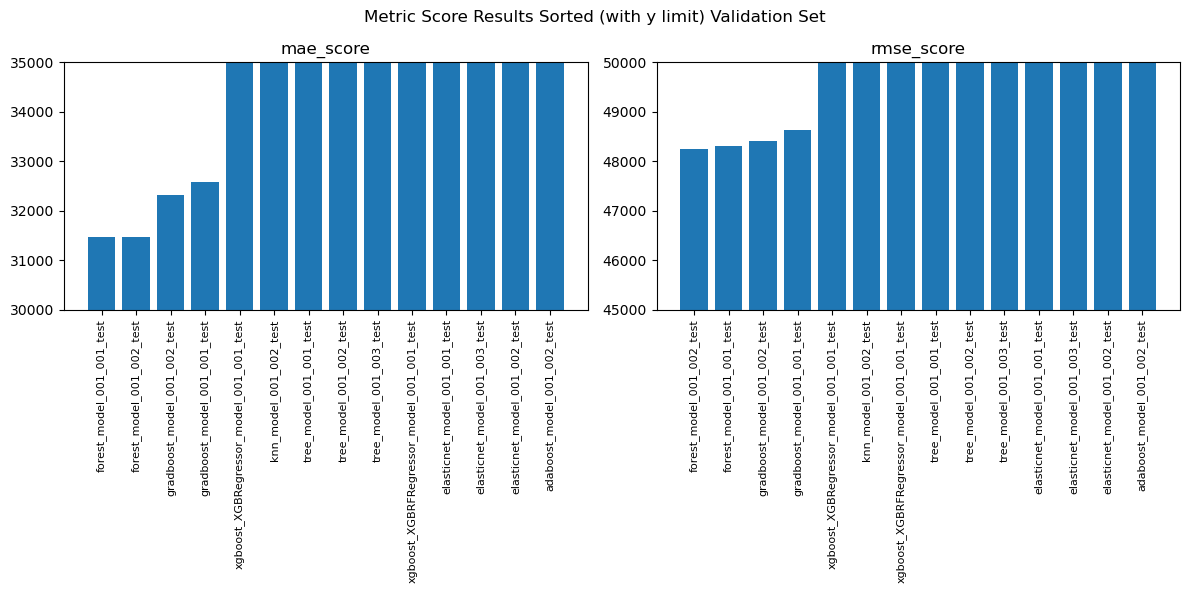

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
   
axes[0].bar(x=df_all_results_02_sort_mae['mae_score'].index, height=df_all_results_02_sort_mae['mae_score'].values)
axes[1].bar(x=df_all_results_02_sort_rmse['rmse_score'].index, height=df_all_results_02_sort_rmse['rmse_score'].values)


axes[0].set_ylim(30000,35000)
axes[1].set_ylim(45000,50000)

axes[0].set_title('mae_score')
axes[1].set_title('rmse_score')


axes[0].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_mae['mae_score'].index, rotation=90, fontsize=8)
axes[1].set_xticks(ticks=range(0,14,1), labels=df_all_results_02_sort_rmse['rmse_score'].index, rotation=90, fontsize=8)

plt.suptitle("Metric Score Results Sorted (with y limit) Validation Set")

plt.tight_layout()
plt.show()



In [1]:
df_results_02.sort_values(by=["rmse_score","mae_score"])

NameError: name 'df_results_02' is not defined

In [ ]:
82549.89

In [63]:
print(f"y mean: {y02.mean():.2f}")
print(f"y median: {y02.median():.2f}")
print("")
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_test median: {y_test.median():.2f}")


df_results_02.loc[['forest_model_001_002_test', 'forest_model_001_001_test', 'gradboost_model_001_002_test', 'gradboost_model_001_001_test']]

y mean: 206864.41
y median: 179700.00

y_test mean: 207744.36
y_test median: 178300.00


,mae_score,rmse_score
forest_model_001_002_test,31471.12,48254.10
forest_model_001_001_test,31470.62,48305.16
gradboost_model_001_002_test,32322.58,48405.82
gradboost_model_001_001_test,32578.07,48626.31


In [64]:
df_results_03 = df_results_02.loc[['forest_model_001_002_test','forest_model_001_001_test','gradboost_model_001_002_test','gradboost_model_001_001_test']]
df_results_03

,mae_score,rmse_score
forest_model_001_002_test,31471.12,48254.10
forest_model_001_001_test,31470.62,48305.16
gradboost_model_001_002_test,32322.58,48405.82
gradboost_model_001_001_test,32578.07,48626.31


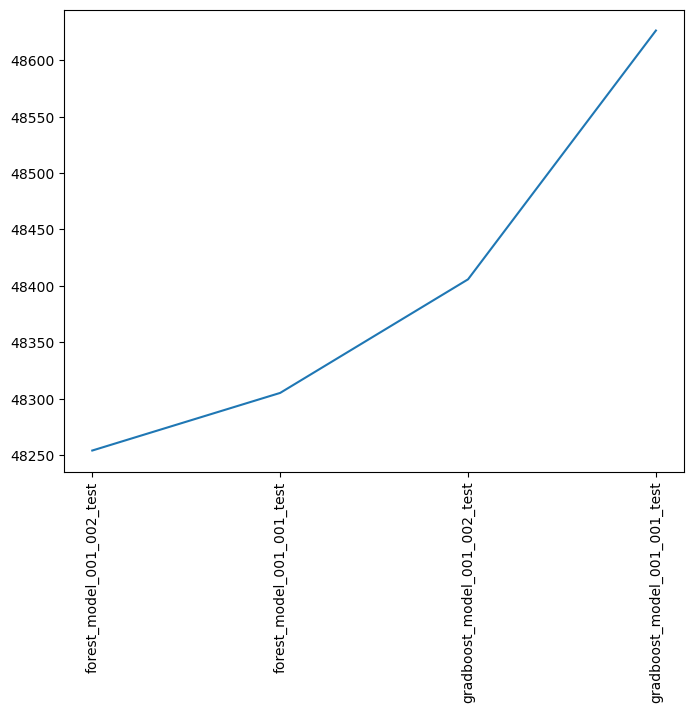

In [65]:
plt.figure(figsize=(8,6))

plt.plot(df_results_03['rmse_score'].index, df_results_03['rmse_score'].values)
plt.xticks(rotation=90)

plt.show()

## Conclusion


* The two worst performing models on the validation set were:
print(df_all_model_results.sort_values(by=['rmse_score', 'mae_score'], ascending=False)[0:10])


| Model | Parameters | mae_score  | rmse_score |
|---|---|---|---|
| score_logreg_model_001_001_valid | 153733.42   | 198670.26 |
| grid_svm_model_001_001           |  84320.53   | 113044.25 |

* Models trained on: 80% and tested on 10% of validation data with parameter tuning.




* The models that seem to be performing best are the following:

| Model | Parameters | mae_score  | rmse_score |
|---|---|---|---|
|forest_model_001_002_test   | RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=280, random_state=42)    | 31471.12 |    48254.10 |
|forest_model_001_001_test   | RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=200, random_state=42)    | 31470.62 |    48305.16 |
|gradboost_model_001_002_test| GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=130, random_state=42) | 32322.58 |    48405.82 |
|gradboost_model_001_001_test| GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=120, random_state=42) | 32578.07 |    48626.31 |

* Models trained on: 80% and tested on 20% of test data without parameter tuning.



The best performing models so far had a MAE of around 31,500 and a RMSE of around 48,000. Although those scores are still really big, they are better in comparison with the other models, especially the worst performing models that had a RMSE of around 198,000 and around 113,000.

A prediction variation of 48,000 USD is a lot. There is room for improvement.
There are a lot of variables affecting the value of a property.
There might be ways to increase the performance of this model with the amount of data given could be to introduce other features by using feature engineering and do more hyperparameter tuning.

The difficulty on increasing the model's performance can be attributed to different factors. A factor that could be beneficial could be to increase the quantity of (good) data in order to train the model.


RMSE 